In [14]:
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as stats
import sklearn.metrics as metrics
from statsmodels.tools.eval_measures import rmse, mse, meanabs

In [12]:
df1 = pd.read_csv(r'C:/Users/ANUJ OJHA/Desktop/Salary_Data.csv')
print(df1)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


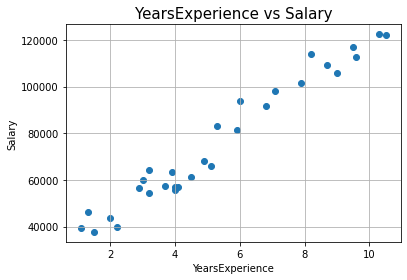

In [6]:
plot.scatter(df1['YearsExperience'], df1['Salary'])
plot.title('YearsExperience vs Salary', fontsize=15)
plot.xlabel('YearsExperience')
plot.ylabel('Salary')
plot.grid(True)
plot.show()


In [7]:
df2 = pd.DataFrame(df1,columns=['YearsExperience','Salary'])

X = df2[['YearsExperience']]
Y = df2['Salary']
reg = LinearRegression()
reg.fit(X, Y)

print('Intercept: \n', reg.intercept_)
print('Coefficients: \n', reg.coef_)


Intercept: 
 25792.20019866871
Coefficients: 
 [9449.96232146]


In [8]:
New_exp = 5
print('Predicted Salary: \n', reg.predict([[New_exp]]))

X = stats.add_constant(X)

model = stats.OLS(Y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)




Predicted Salary: 
 [73042.01180594]
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        00:58:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const

c:\users\anuj ojha\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


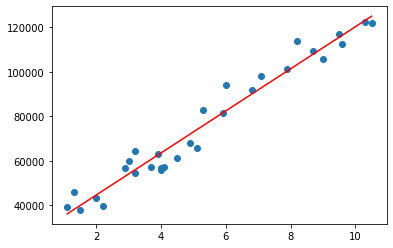

In [9]:
plot.scatter( df2[['YearsExperience']],  df2['Salary'])
plot.plot(df2[['YearsExperience']], 2.579e+04 + 9449.9623*df2[['YearsExperience']], 'r')
plot.show()

In [18]:
y_preds = model.predict(X)
RMSE = rmse(Y, y_preds)
MSE = mse(Y, y_preds)
MAE = meanabs(Y, y_preds)
print("Mean Squared Error: ", MSE)
print("Root Measn Square Error: ", RMSE)
print("Mean Absolute Error: ", MAE)
print("Explain variance score =", round(metrics.explained_variance_score(Y, y_preds), 2))
print("R2 score =", round(metrics.r2_score(Y, y_preds), 2))


Mean Squared Error:  31270951.72228097
Root Measn Square Error:  5592.043608760662
Mean Absolute Error:  4644.20128944354
Explain variance score = 0.96
R2 score = 0.96
